In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define colors
types_and_colors = [
    ('Urban', 'lightcoral'),
    ('Rural', 'gold'),
    ('Suburban', 'lightskyblue'),
]

# Read the City and Ride Data
city_df = pd.read_csv('data/city_data.csv')
ride_df = pd.read_csv('data/ride_data.csv')

# Combine the data into a single dataset
combined_df = ride_df.merge(city_df, on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
grouped_by_city = combined_df.groupby('city')

bubble_df = pd.DataFrame({
    'type': grouped_by_city['type'].first(),
    'driver_count': grouped_by_city['driver_count'].first(),
    'avg_fare': grouped_by_city['fare'].mean(),
    'total_rides': grouped_by_city['ride_id'].count(),
})
bubble_df.head()

,type,driver_count,avg_fare,total_rides
city,,,,
Amandaburgh,Urban,12,24.641667,18
Barajasview,Urban,26,25.332273,22
Barronchester,Suburban,11,36.422500,16
Bethanyland,Suburban,22,32.956111,18
Bradshawfurt,Rural,7,40.064000,10


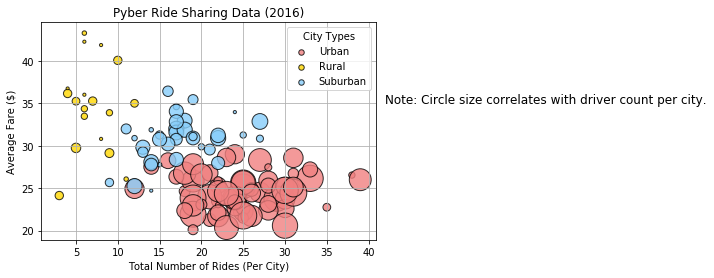

In [3]:
# Obtain the x and y coordinates for each of the three city types
for current_type, color in types_and_colors:
    type_rows = bubble_df.loc[bubble_df['type'] == current_type]

    # Build the scatter plots for each city types
    plt.scatter(
        type_rows['total_rides'], 
        type_rows['avg_fare'], 
        s=10*type_rows['driver_count'],
        color=color,
        edgecolor='black',
        label=current_type,
        alpha=0.8,
    )

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
legend = plt.legend(title="City Types")
for handle in legend.legendHandles:
    handle._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)

# Save Figure
plt.savefig('figs/bubble.png', bbox_inches='tight')

## Total Fares by City Type

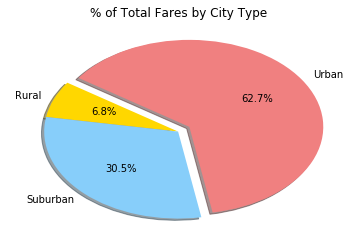

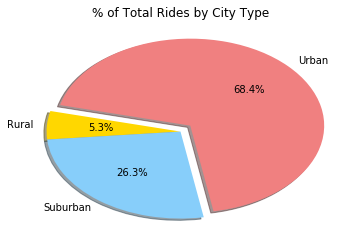

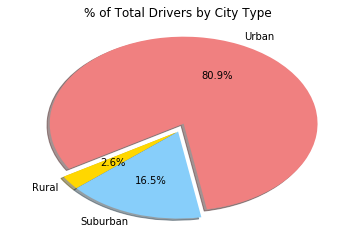

In [4]:
# collect data by type
types = []
colors = []
total_fares = []
total_rides = []
total_drivers = []

for current_type, color in types_and_colors:
    
    # filter dataframes
    type_combined_df = combined_df.loc[combined_df['type'] == current_type]
    type_city_df = city_df.loc[city_df['type'] == current_type]

    # append data
    types.append(current_type)
    colors.append(color)    
    total_fares.append(type_combined_df['fare'].sum())
    total_rides.append(type_combined_df['ride_id'].count())
    total_drivers.append(type_city_df['driver_count'].sum())

charts = [
    ('Fares', total_fares),
    ('Rides', total_rides),
    ('Drivers', total_drivers),
]
    
# Build Pie Charts
for title, data in charts:
    plt.pie(
        data, 
        labels=types, 
        colors=colors, 
        shadow=True, 
        autopct='%.1f%%',
        startangle=280,
        explode=[0.1 if t == 'Urban' else 0 for t in types],
    )
    plt.title(f'% of Total {title} by City Type')
    plt.savefig(f'figs/fares_by_{title.lower()}.png')
    plt.show()